On this project, a customized deep learning model was constructed layer by layer to detect and clasify various body areas images. The model was designed for image classification using data sourced from Google Images. All training images are organized within a single folder, with distinct classes stored in separate subfolders named after their respective class names. The subsequent steps and procedures undertaken will be elaborated upon in a step-by-step manner.

### Step 0.

Import the necessary libraries.

In [ ]:
from keras.models import Model, load_model, Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import keras
import numpy as np
import os

### Step 1.

Unzipping the Folder and divided into train path and test path.

In [ ]:
!unzip SkinArea.zip

In [ ]:
train_path = os.getcwd() + '/SkinArea'
test_path = os.getcwd() + '/SkinArea'

In [ ]:
train_datagen = ImageDataGenerator(validation_split=0.3, #Fraccion de imagenes reservadas para validacion.
                                   shear_range=0.2, #Intensidad de corte
                                   zoom_range=0.2, #Range for random zoom 0.2
                                   horizontal_flip=True #Randomly flip inputs horizontally.
                                   )#Se usa para generar el entramiento de las imagenes

train_generator = train_datagen.flow_from_directory(
    directory=train_path,  #Direccion donde se encuntran las subcarpetas de cada categerias que contienen las imagenes respectivas
    target_size=(image_size,image_size), #Tamanio de la imagen
    batch_size=batch_size, #cantidad de imagenes
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

Found 853 images belonging to 6 classes.


In [ ]:
x_batch, y_batch = train_generator.next()

In [ ]:
 num_classes = len(np.unique(train_generator.classes))

In [ ]:
image_size = 224
batch_size = 16

### Step 3.

Building a CNN.

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(image_size, image_size,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('sigmoid'))
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 activation_17 (Activation)  (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 109, 109, 32)      9248      
                                                                 
 activation_18 (Activation)  (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 54, 54, 32)        0         
 ng2D)                                                

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history = model.fit(x_batch, y_batch, validation_split=0.30, batch_size=batch_size, epochs=20, verbose=10)

Epoch 18/20
Epoch 19/20
Epoch 20/20


In [ ]:
#Save the model
#model.save('fine_tune.h5')

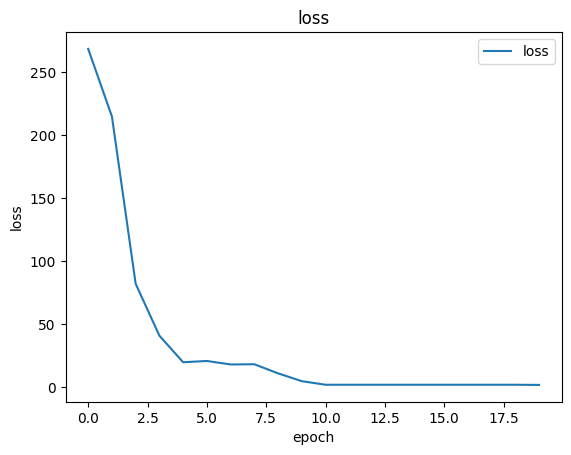

In [ ]:
#summarize history for accuracy

plt.plot(history.history['loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper right')
plt.show()

In [ ]:
#tamanio de la graficas
#ciclo que va desde 0 hasta 15
#Creo un valor aleatorio a partir del batch_size con la funcion de numpy, random.
 #Con valor aleatorio obtenido en la parte superior nos posicionamos en la lista de x_batch
 #Mostrar multiples imagenes
#Titulo a la clase que pertenece cada imagen
#Mostrar la imagen
plt.show()

## Step 4.

Validation and prediction

<ipython-input-60-7328edae96b5>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  image = x_batch[num].astype(np.int)
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


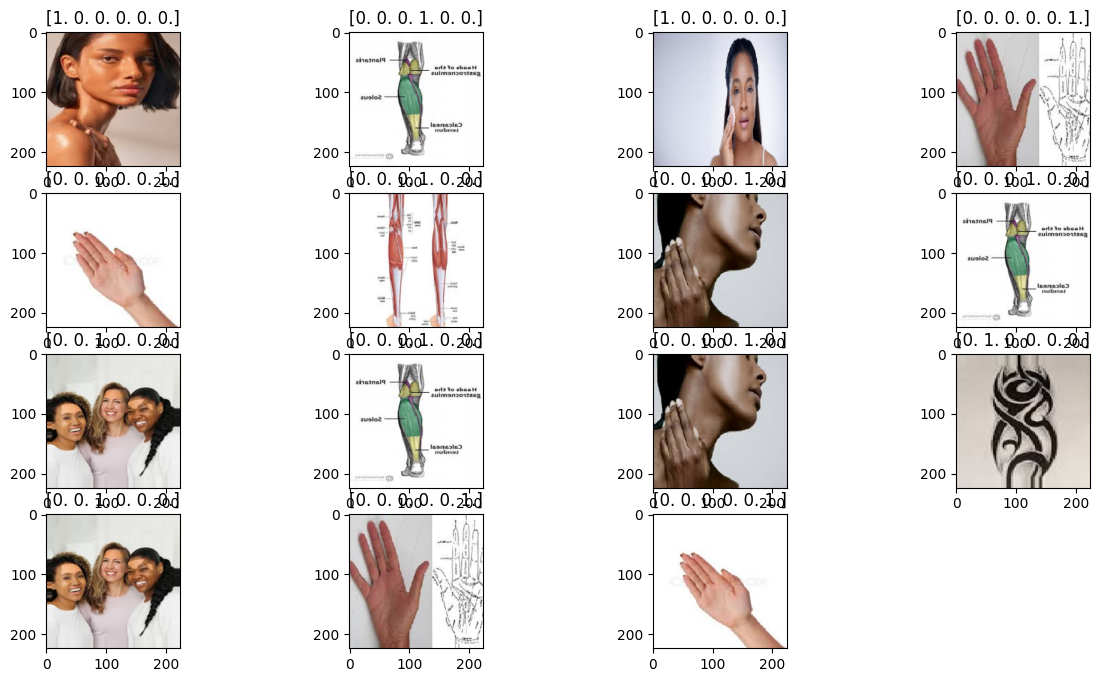

In [ ]:
fig = plt.figure(figsize=(15,8))
columns = 4
rows = 4
for i in range(1, columns*rows):
  num = np.random.randint(batch_size)
  image = x_batch[num].astype(np.int)
  fig.add_subplot(rows, columns, i)
  plt.title(y_batch[num])
  plt.imshow(image)
plt.show()

Found 853 images belonging to 6 classes.
1/1 [==============================] - 0s 72ms/step


<ipython-input-83-ee97819ae6b5>:30: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  image = x_batch[0].astype(np.int) #quiatar dimension de la imagen


1/1 [==============================] - 0s 58ms/step


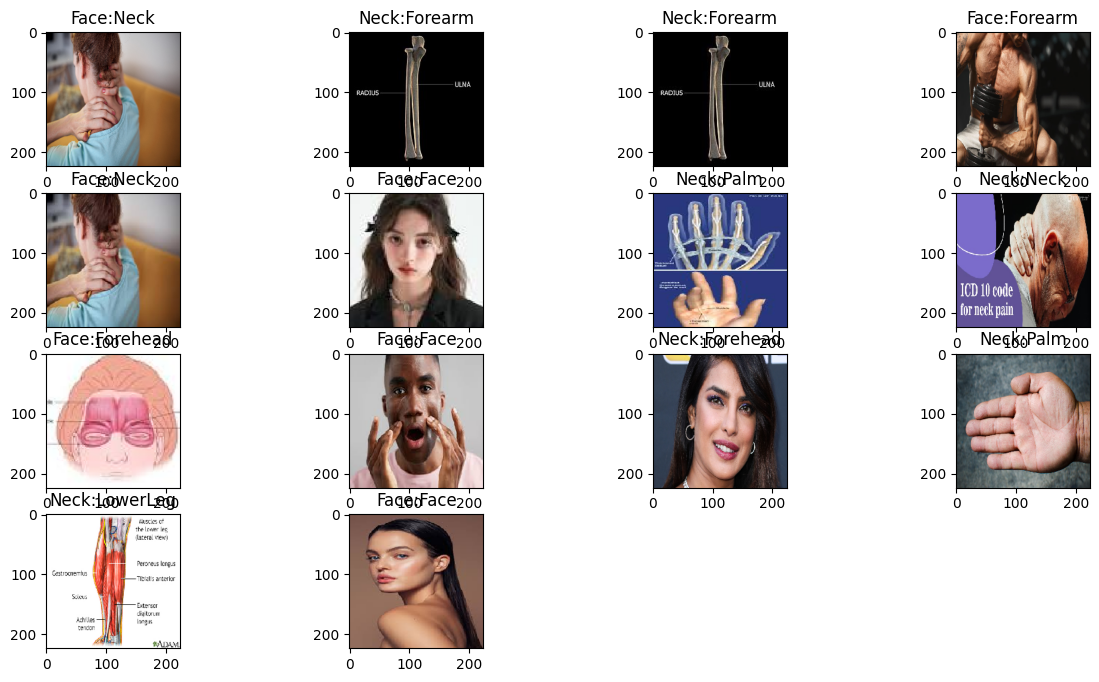

In [ ]:
test_datagen = ImageDataGenerator() #Generador de las imagenes de prueba
test_generator = test_datagen.flow_from_directory(
                          directory=test_path,
                          target_size=(image_size, image_size),
                          color_mode='rgb',
                          shuffle=True,
                          class_mode='categorical',
                          batch_size=1) #Generador de las imagenes de prueba

filenames = test_generator.filenames #Nombre d elos archivos
nb_samples = len(filenames) #cantidad de los archivos
test_generator.reset() #restet del generador

fig = plt.figure(figsize=(15,8)) #tama;op de la figura
columns = 4
rows = 4
for i in range(1, columns*rows -1): #ciclo que proyectara 14 imagenes
  x_batch, y_batch = test_generator.next() #x_batch es la imagen y y_batch la clase

  name = model.predict(x_batch) #Prediccion
  name = np.argmax(name, axis=-1) #Prediccion de la clase
  true_name = y_batch #La clase original
  true_name = np.argmax(true_name, axis=-1) #Clase original

  label_map = test_generator.class_indices #diccionario de la categorias y codigo
  label_map = dict((v,k) for k,v in label_map.items()) #invertir categorias con el codigo
  prediction = [label_map[k] for k in name] #prediccion final
  true_value = [label_map[k] for k in true_name] #valor original

  image = x_batch[0].astype(np.int) #quiatar dimension de la imagen
  fig.add_subplot(rows, columns, i) #proyectar varias imagenes
  plt.title(str(prediction[0]) + ':' + str(true_value[0])) #Titulo de la comparacion de prediccion y original
  plt.imshow(image) #imagen
#|plt.show() #mostrar